## `wmpy_power` tutorial

This tutorial will demonstrate the basic use of `wmpy_power` in two scenarios:
* First, in calibration mode where model parameters are calibrated to a historical generation dataset
* Second, in simulation mode where previously calibrated model parameters are used to simulate generation

In [2]:
import numpy as np
import pandas as pd
import logging
import matplotlib.pyplot as plt
import psutil
from wmpy_power import Model
from wmpy_power.utilities import download_data

In [3]:
# Download the tutorial data from Zenodo
# By default places the data into the current directory
download_data(data='tutorial', to='./')

https://zenodo.org/records/10530347/files/wmpy_power_tutorial_wauw.zip?download=1: 100%|████████████████████████████████████| 7.75M/7.75M [00:12<00:00, 627kB/s]


In [4]:
# set paths to the freshly downloaded tutorial input data
dir_data = './wmpy_power_tutorial/input'
reservoir_parameters_path = f'{dir_data}/wauw-reservoir_parameter.parquet'
monthly_observed_generation_path = f'{dir_data}/wauw-monthly_obs_generation.parquet'
daily_flow_storage_path = f'{dir_data}/wauw-Daymet_VIC4-daily_flow_storage.parquet'
daily_flow_storage_scenario_path = f'{dir_data}/wauw-MPI-ESM1-2-HR-Daymet_VIC4-daily_flow_storage.parquet'


Set output directory

In [5]:
dir_out = './output/'

Instantiate the model. Note that the 'balancing authority' string must match the key found in the 'balancing_authority' column in the reservoir parameters, observed generation, and daily flow and storage datsets. Also note that the random seed, used by the SCE algorithm, can be specified for reproducibility, but is not required.

In [6]:
m = Model(
        calibration_start_year = 2001,
        calibration_end_year = 2013,
        balancing_authority = 'WAUW',
        simulated_flow_and_storage_glob = daily_flow_storage_path,
        observed_hydropower_glob = monthly_observed_generation_path,
        reservoir_parameter_glob = reservoir_parameters_path,
        seed = 500,
        log_to_stdout = False,
        output_path = dir_out,
        output_type = 'csv'
);


### Calibration
Calibrate the model.

In [7]:
calibrations = m.run();

Plot the modeled hydropower generation against the observed generation for each facility

(since Jupyter shows figures by default, use the `show_plots` argument to disable manually displaying the figures)

[<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>]

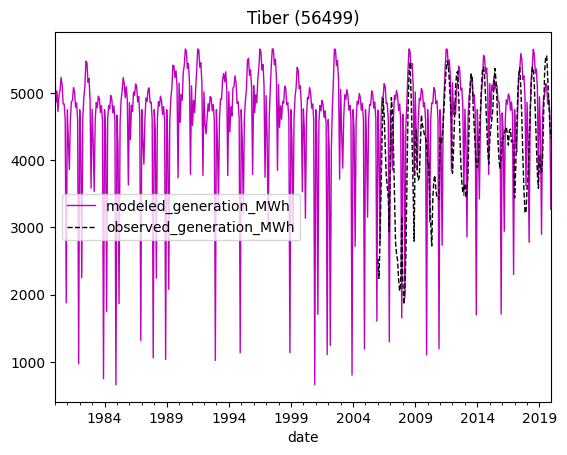

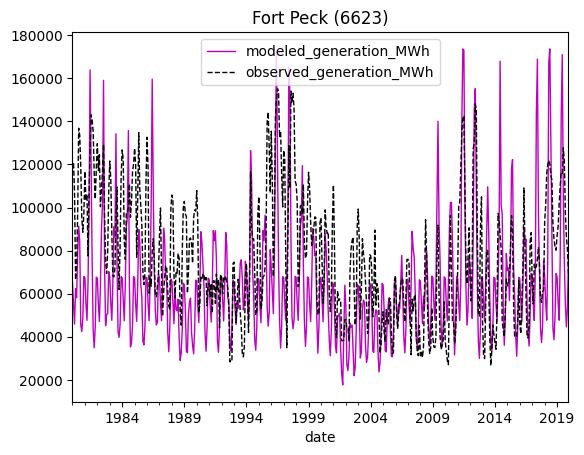

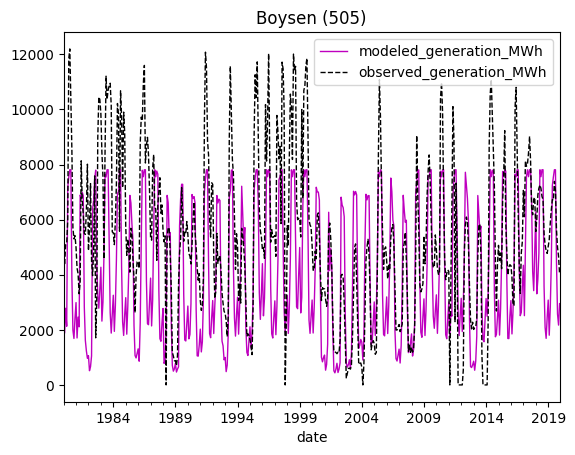

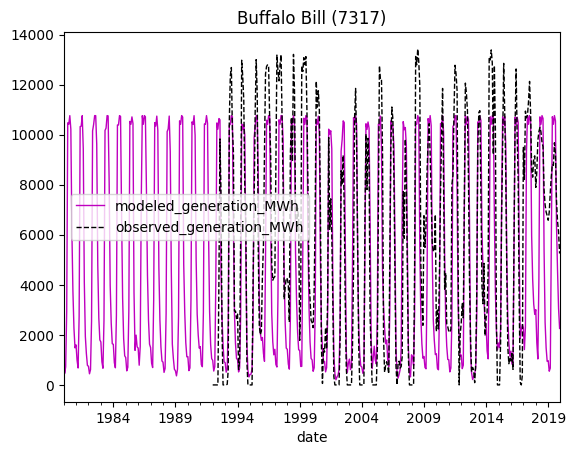

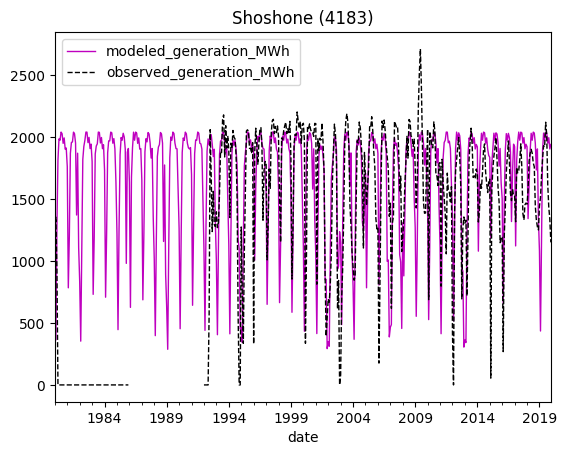

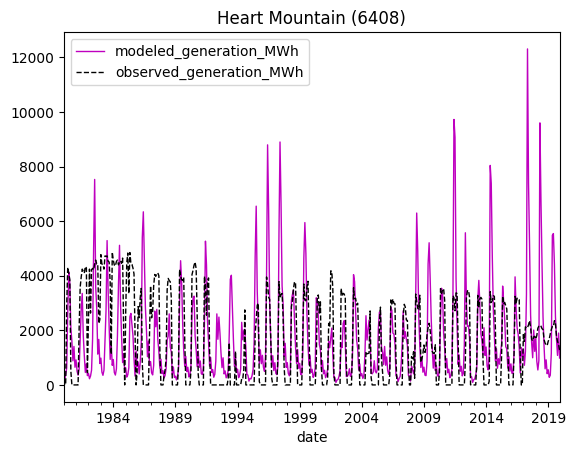

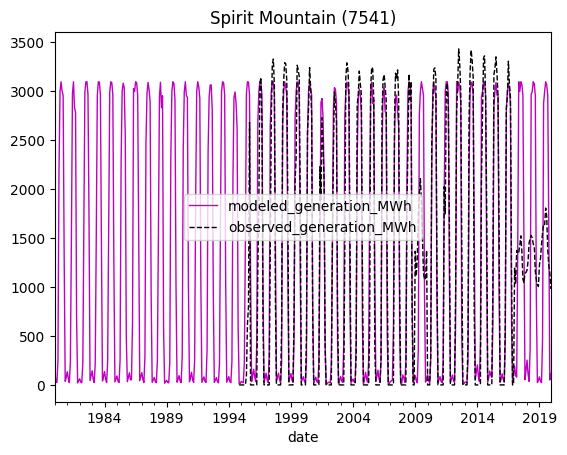

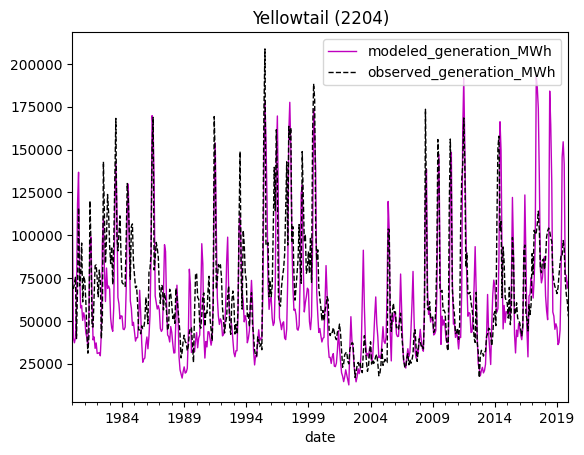

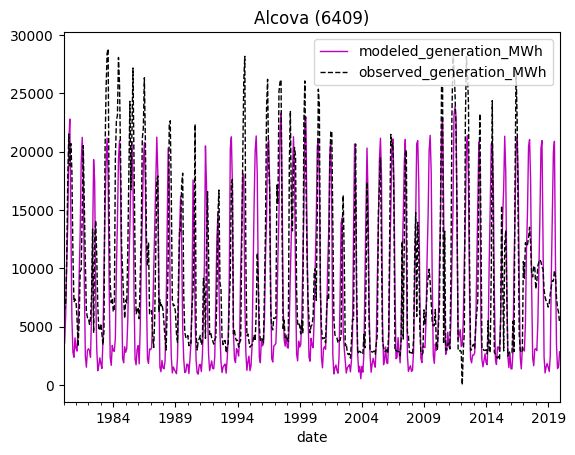

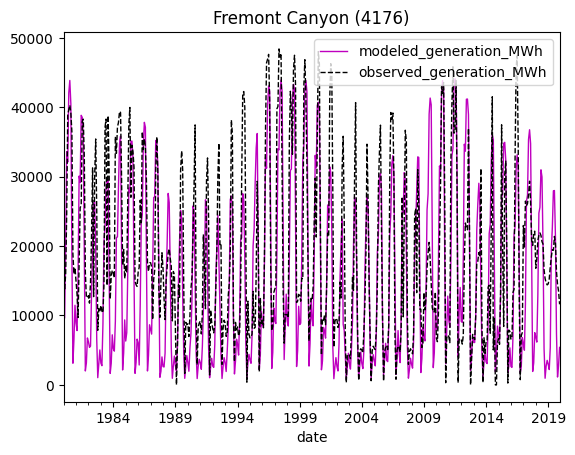

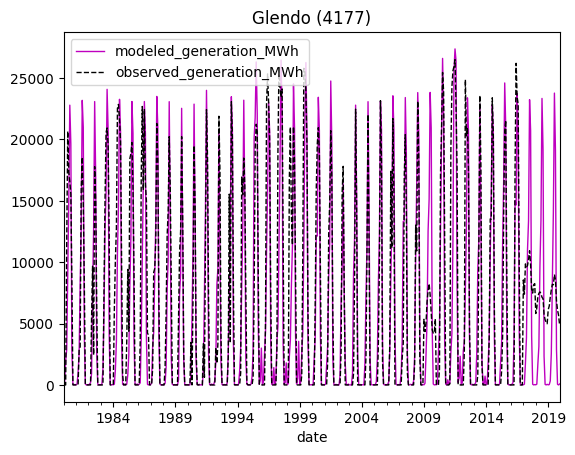

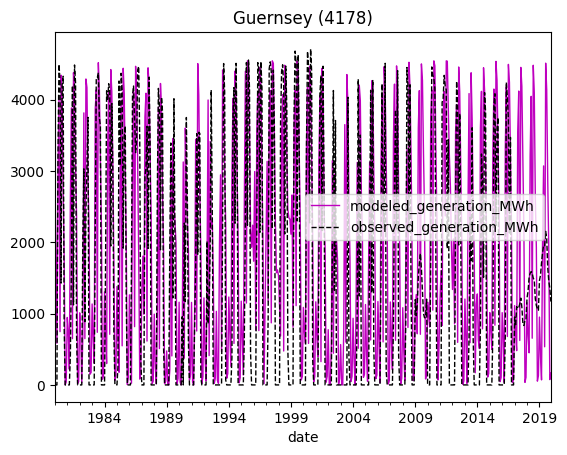

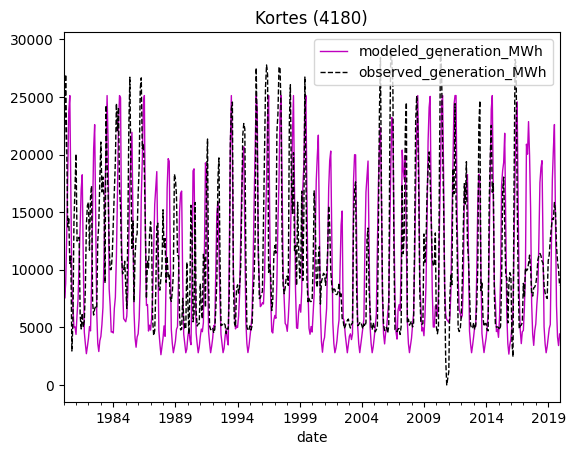

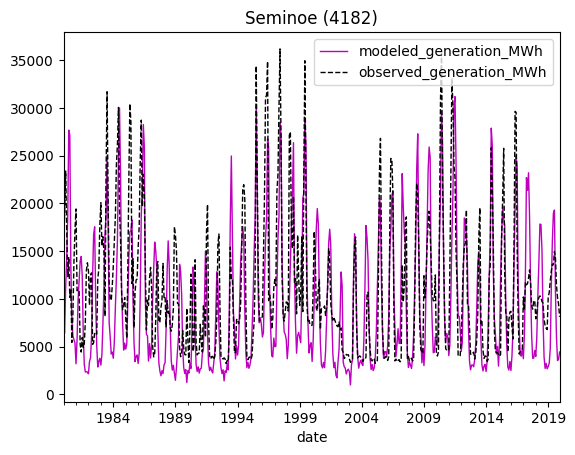

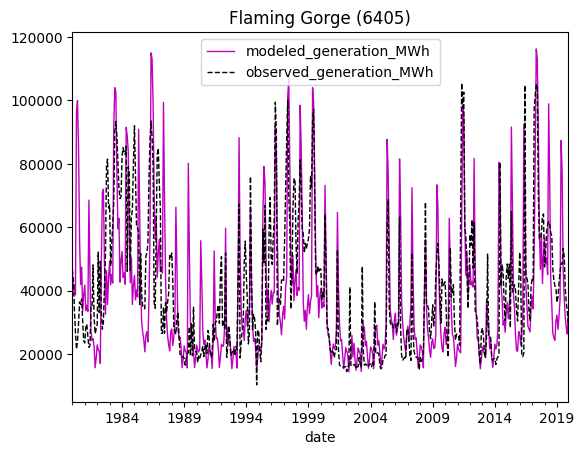

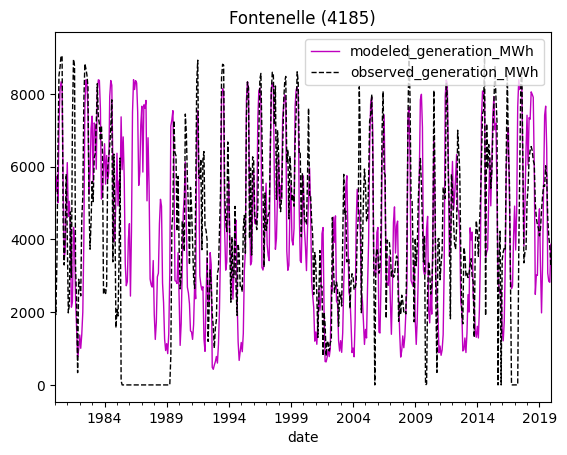

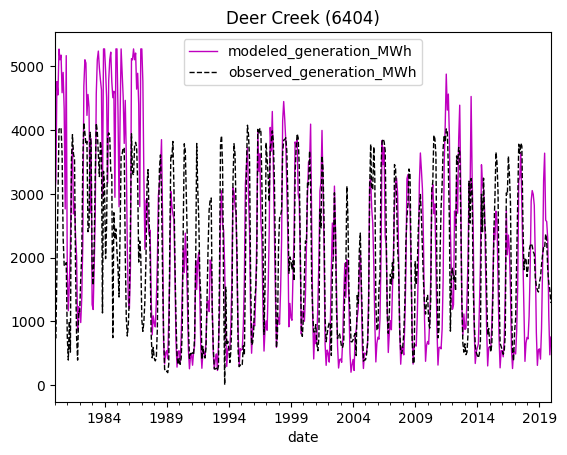

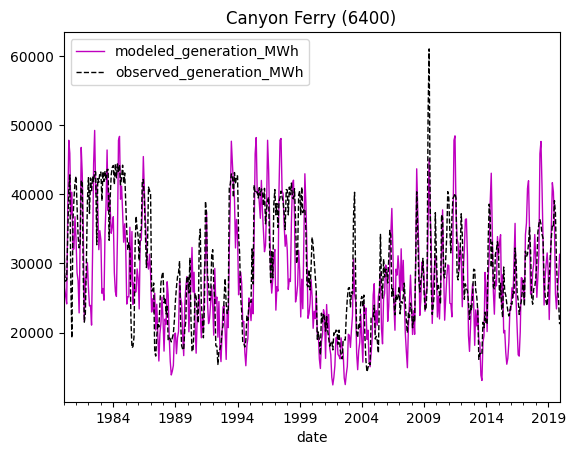

In [8]:
m.plot(calibrations, show_plots=False)

### Simulation
Using the calibrated parameters, simulate generation for the historical period - using flow and storage data in the 'wauw-Daymet_VIC4-daily_flow_storage.parquet' file.

In [9]:
generation = Model.get_generation(
    calibration_parameters_path = 'output/WAUW_plant_calibrations.csv',
    reservoir_parameters_path = reservoir_parameters_path,
    flow_and_storage_path = daily_flow_storage_path,
    run_name = 'control-Daymet_VIC4',
    start_year = 1980,
    end_year = 2013,
    write_output = True,
    output_csv = True,
    output_path = dir_out
)

Using the calibrated parameters, simulate generation for the historical period - using flow and storage data in the 'wauw-MPI-ESM1-2-HR-Daymet_VIC4-daily_flow_storage.parquet' file.

In [10]:
generation = Model.get_generation(
    calibration_parameters_path = 'output/WAUW_plant_calibrations.csv',
    reservoir_parameters_path = reservoir_parameters_path,
    flow_and_storage_path = daily_flow_storage_scenario_path,
    run_name = 'cc-MPI-ESM1-2-HR-Daymet_VIC4',
    start_year = 1980,
    end_year = 2059,
    write_output = True,
    output_csv = True,
    output_path = dir_out
)

In [13]:
# TODO plot a sample output from the above?

### Examining input files
Each input file can be viewed by reading it in as shown below.

In [14]:
reservoir_parameters = pd.read_parquet(reservoir_parameters_path)
hydropower = pd.read_parquet(monthly_observed_generation_path)
flow_storage_control = pd.read_parquet(daily_flow_storage_path)
flow_storage_cc = pd.read_parquet(daily_flow_storage_scenario_path)

In [15]:
reservoir_parameters

,eia_plant_id,balancing_authority,name,nameplate_capacity_MW,plant_head_m,storage_capacity_m3,use_run_of_river
0,56499,WAUW,Tiber,7.5,60.0456,1.193170e+09,False
1,6623,WAUW,Fort Peck,179.7,67.0560,1.899559e+10,False
2,505,WAUW,Boysen,15.0,43.8912,8.652986e+08,False
3,7317,WAUW,Buffalo Bill,18.0,80.7720,7.975250e+08,False
4,4183,WAUW,Shoshone,3.0,80.7720,7.975250e+08,False
5,6408,WAUW,Heart Mountain,5.0,80.7720,7.975250e+08,False
6,7541,WAUW,Spirit Mountain,4.5,33.5280,7.975250e+08,False
7,2204,WAUW,Yellowtail,268.8,150.5712,1.258856e+09,False
8,6409,WAUW,Alcova,41.4,56.3880,2.274599e+08,False
9,4176,WAUW,Fremont Canyon,66.8,91.4400,1.253832e+09,False


In [16]:
hydropower

,year,month,eia_plant_id,generation_MWh
0,1980,1,6400,38221.193
1,1980,1,56499,NaN
2,1980,1,6623,118182.000
3,1980,1,505,4857.378
4,1980,1,2204,69221.850
...,...,...,...,...
8635,2019,12,4182,8121.915
8636,2019,12,6409,5325.475
8637,2019,12,4185,3270.623
8638,2019,12,6405,28942.787


In [17]:
flow_storage_control

,date,eia_plant_id,flow,storage
0,1980-01-01,505,47.617992,6.081270e+08
1,1980-01-02,505,48.164268,6.039640e+08
2,1980-01-03,505,48.194508,6.006772e+08
3,1980-01-04,505,45.806580,6.016191e+08
4,1980-01-05,505,45.223656,6.045524e+08
...,...,...,...,...
262975,2019-12-27,56499,68.863724,1.057953e+09
262976,2019-12-28,56499,69.009079,1.056824e+09
262977,2019-12-29,56499,69.117706,1.055140e+09
262978,2019-12-30,56499,66.041557,1.053278e+09


In [18]:
flow_storage_cc

,date,eia_plant_id,flow,storage
0,1980-01-01,6404.0,0.901211,130589744.0
1,1980-01-02,6404.0,1.131926,130689672.0
2,1980-01-03,6404.0,1.132730,130801640.0
3,1980-01-04,6404.0,1.134943,130917672.0
4,1980-01-05,6404.0,0.972300,131036328.0
...,...,...,...,...
525955,2059-12-27,56499.0,38.036854,971667904.0
525956,2059-12-28,56499.0,37.738796,970448448.0
525957,2059-12-29,56499.0,38.162254,969234880.0
525958,2059-12-30,56499.0,41.247116,968032448.0
